In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [2]:
tf.__version__

'2.9.1'

In [3]:
# 准备数据集
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
train_labels.shape

(60000,)

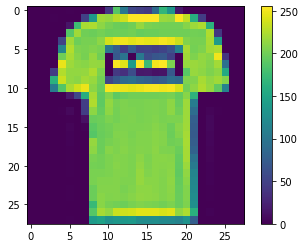

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#数据预处理
train_images = train_images / 255.0

test_images = test_images / 255.0

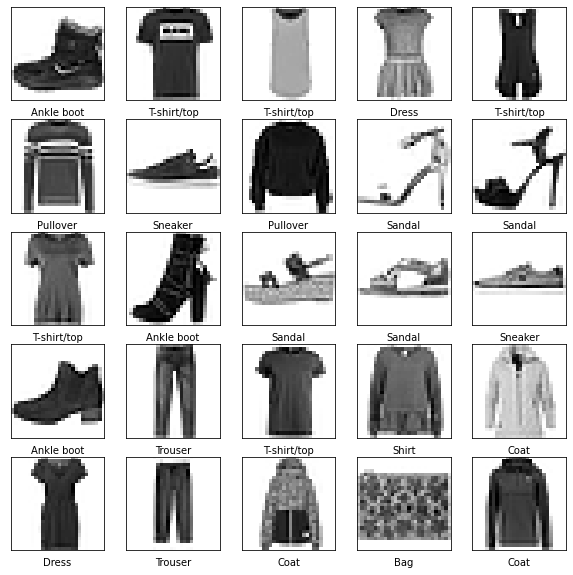

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4998 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3741 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3353 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3125 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2940 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2798 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2660 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2575 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2454 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.238

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3343 - accuracy: 0.8822 - 447ms/epoch - 1ms/step

Test accuracy: 0.8822000026702881


In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 964us/step


In [17]:
predictions[0]

array([4.99074693e-09, 5.23111034e-11, 3.59313523e-10, 1.73346407e-11,
       3.20407090e-10, 2.00368389e-02, 1.10986576e-07, 3.86325573e-03,
       2.25354793e-08, 9.76099730e-01], dtype=float32)

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

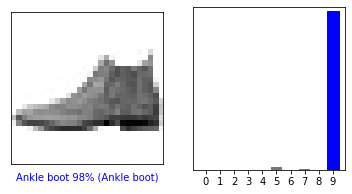

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

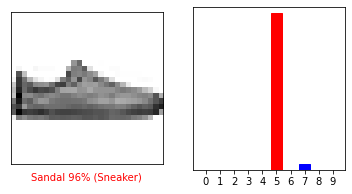

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

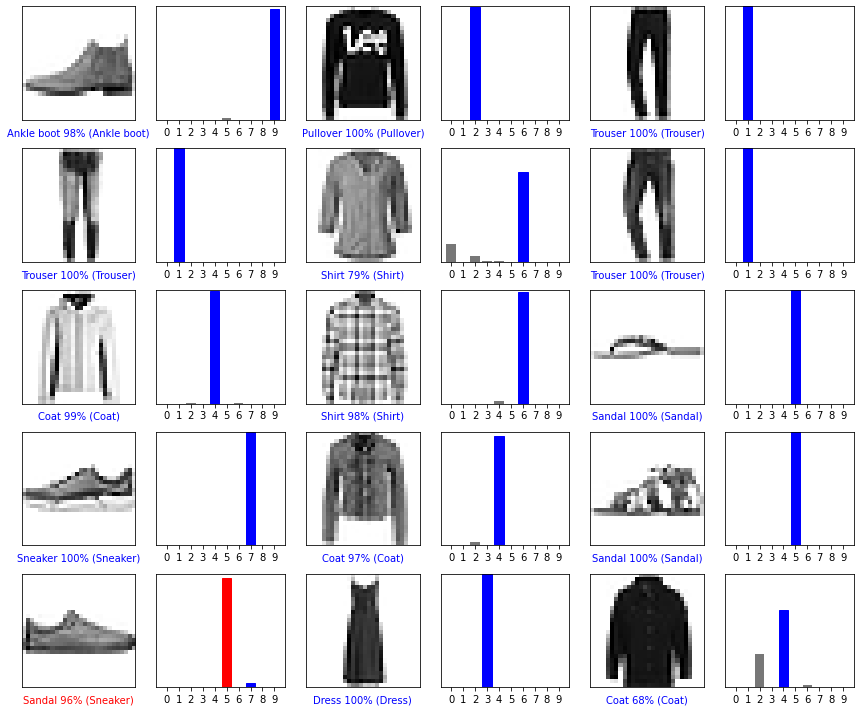

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[4.0297826e-05 1.0184796e-18 9.9818391e-01 5.5739041e-15 1.7654237e-03
  2.7804342e-07 1.0134442e-05 1.3775593e-17 6.0460872e-12 3.9938971e-15]]


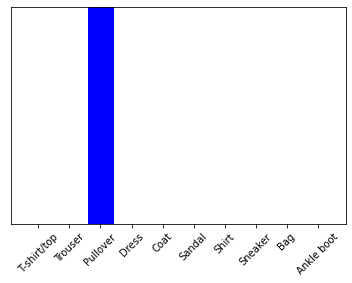

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

2